In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/Mart_train.csv")

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observations:
    1. Skewness seems to be present in Item_Outlet_Sales
    

# Check NAN values

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

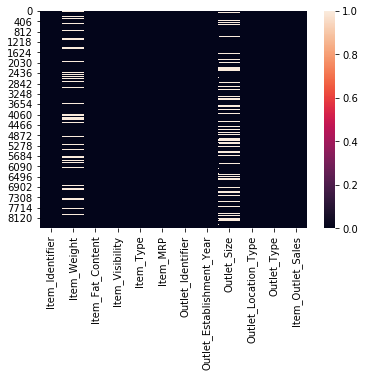

In [8]:
sns.heatmap(df.isnull())

# NAN values present for Item_Weight and Outlet_Size

In [9]:
# Replacing NAN

df["Item_Weight"] = df["Item_Weight"].replace(np.nan,df['Item_Weight'].mean())

#Replaces NAN in Item_Weight with mean value

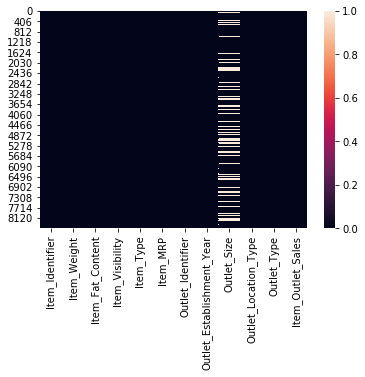

In [10]:
sns.heatmap(df.isnull())

In [11]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [12]:
#Replaces NAN in Outlet_Size with mode value

df["Outlet_Size"] = df["Outlet_Size"].replace(np.nan,"Medium")

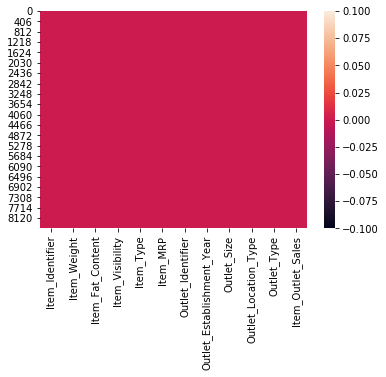

In [13]:
sns.heatmap(df.isnull())

# Checking any ?

In [14]:
(df =="?").sum()

# No ? present in the data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Bivarient analysis

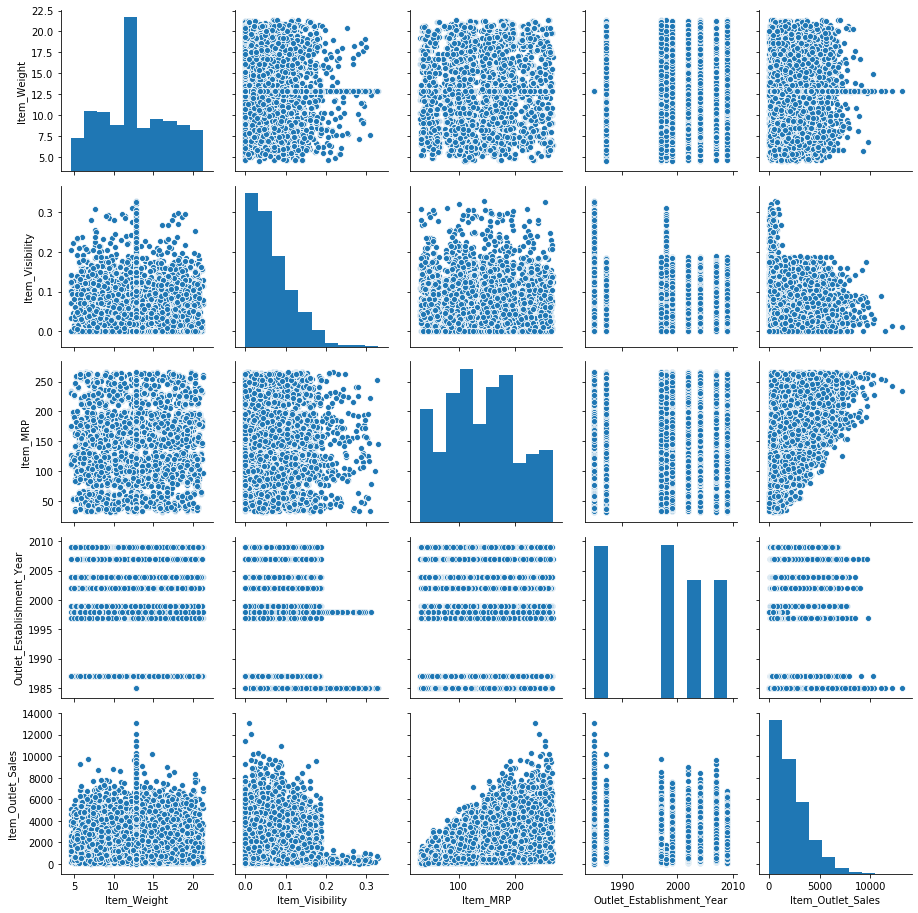

In [15]:
sns.pairplot(df)

Observations:
    1. Items with high MRP were having more sales as compared to items with low MRP
    2. Items with less visibility had higher sales as compared to items with high visibility
    3. Sales were more around 1990 as compared to 2000 and 2010
    4. Items with weight around 13 were having the highest sales

# Correlation

In [16]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Observations
1. Item_weight , Item_Visibility and Outlet_Establishment_Year are negatively correlated with each other
2. Item_weight , Item_MRP are directly correclated with the Sales
3. Item_Visibility and Outlet_Establishment_Year are negatively correlated with the Sales

# Using Label Encoder

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
# Conveting Non numeric values to numeric for analysis purpose

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'].astype(str))
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'].astype(str))
df['Item_Type'] = le.fit_transform(df['Item_Type'].astype(str))
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'].astype(str))
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'].astype(str))
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'].astype(str))
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'].astype(str))

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


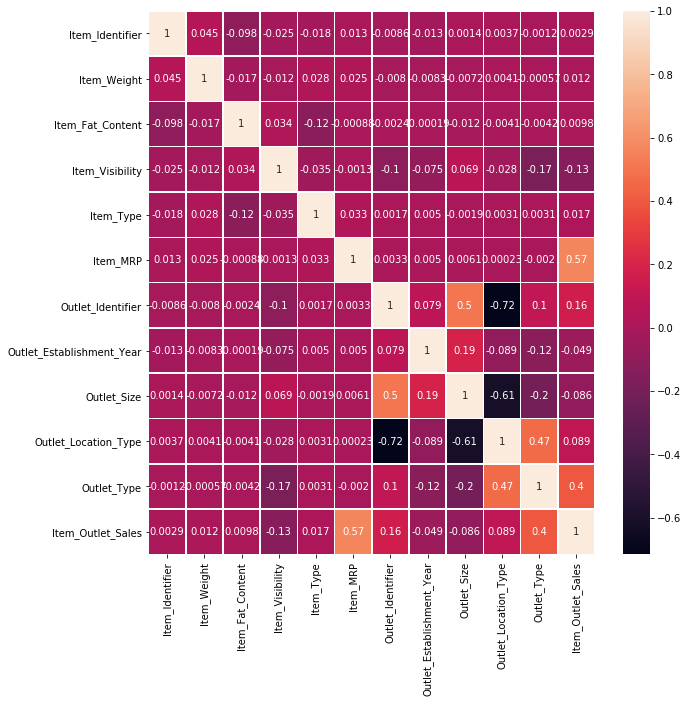

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() , linewidths=.5 , annot = True )

Observations
1. Outlet_Location_Type is negatively correlated to Outlet_Identifier and Outlet_Size
2. Sales is positively correlated to Item_MRP and Outlet_Type
3. Outlet_Identifier is positively correlated to Outlet_Size

# Finding and Removing Outliers

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [23]:
df.shape

(8523, 12)

In [24]:
col_list = df.columns.values

ncols = 12
nrows = 10

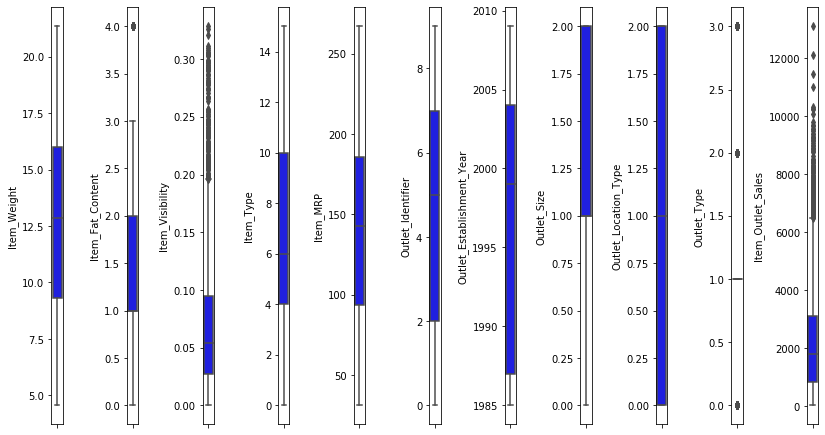

In [25]:

plt.figure(figsize = (ncols, 5*ncols))
for i in range( 0 , len(col_list)):
    plt.subplot(nrows , ncols , i+1)
    sns.boxplot(df[col_list[i]] , color = 'blue' , orient = 'v')
    plt.tight_layout()

Observations
1. Outliers are seen present in Item_Fat_Content, Item_Visibility, Outlet_Type and Item_Outlet_Sales

In [26]:
from scipy.stats import zscore


z = np.abs(zscore(df))

df_new = df[(z<3).all(axis = 1) ]

df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [27]:
df.shape , df_new.shape 

# We can see that outliers are removed from the new dataframe df_new

((8523, 12), (8222, 12))

In [28]:
# Separating attributes from Target variable for train_test_split

x1 = df_new.iloc[: , 0:-1]

x1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [29]:
x1.shape

(8222, 11)

# Checking Skewness

In [30]:
x1.skew()

# Skewness is een present in Item_Visibility and Outlet_Type

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
dtype: float64

In [31]:
# Reducing Skewness using squareroot method of numpy


for col in x1.columns:
    if x1.skew().loc[col]>0.55:
        x1[col] = np.sqrt(x1[col])[0]

In [32]:
x1.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.000000
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.000000
dtype: float64

In [33]:
# Scaling the input Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x1)
x = pd.DataFrame(x, columns = x1.columns)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.385259,-0.837583,-0.583894,0.0,-0.769127,1.771577,1.496796,0.122796,-0.279989,-1.370796,0.0
1,-1.712986,-1.632565,1.175922,0.0,1.611449,-1.484581,-0.616358,1.324302,-0.279989,1.099221,0.0
2,-0.264789,1.091072,-0.583894,0.0,0.659219,0.023598,1.496796,0.122796,-0.279989,-1.370796,0.0
3,0.751607,1.490915,1.175922,0.0,-0.293012,0.677560,-1.672935,0.002645,-0.279989,1.099221,0.0
4,1.141335,-0.924608,-0.583894,0.0,0.421161,-1.394231,-1.320743,-1.319012,-1.940930,1.099221,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8217,-0.911384,-1.410300,-0.583894,0.0,1.373392,1.201460,-1.320743,-1.319012,-1.940930,1.099221,0.0
8218,0.255588,-1.053969,1.175922,0.0,-1.721358,-0.517011,0.792411,0.483248,-0.279989,-0.135788,0.0
8219,1.274197,-0.531821,-0.583894,0.0,0.183103,-0.889167,0.440219,0.723549,1.380953,-0.135788,0.0
8220,-0.222716,-1.329155,1.175922,0.0,1.373392,-0.598177,-0.616358,1.324302,-0.279989,1.099221,0.0


In [34]:
x.skew()

# No skewness observed post scaling the attribute data

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.000000
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.000000
dtype: float64

In [35]:
# Separating Target variable from attribute for train_test_split
y = df_new.iloc[:,-1]

y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [36]:
# Reshaping target data for data analysis
y = y.values.reshape(-1,1)

x.shape , y.shape

((8222, 11), (8222, 1))

# Data Analysis - Linear Regression

In [61]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def maxr2_score(regr, x, y):
    max_r_score = 0
    for r_state in range(42 , 100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state , test_size = 0.20)
        regr.fit(x_train , y_train)
        y_pred = regr.predict(x_test)
        r2_scr  = r2_score(y_test, y_pred)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("Max r2 score corresponding to ", final_r_state , " is " , max_r_score)
    return(final_r_state)

In [38]:
from sklearn.linear_model import LinearRegression 

lreg = LinearRegression()


r_state = maxr2_score(lreg,x,y)

Max r2 score corresponding to  88  is  0.45930838325077994


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors = {"n_neighbors" : range(1,30)}

knr = KNeighborsRegressor()
gknr = GridSearchCV(knr , neighbors , cv = 10)
gknr.fit(x,y)
gknr.best_params_


{'n_neighbors': 28}

In [57]:
knr = KNeighborsRegressor(n_neighbors = 28)

r_state = maxr2_score(knr,x,y)

Max r2 score corresponding to  88  is  0.5829917226684295


In [41]:
#Lets check mean r2 score of both Linear regression model and knr

from sklearn.model_selection import cross_val_score

cv_score_lreg = cross_val_score(lreg ,x , y , cv = 5 , scoring = "r2")
cv_score_knr  = cross_val_score(knr ,x , y , cv = 5 , scoring = "r2")

print("Linear Regression\nCV_score:", cv_score_lreg , "\nMean r2 score :" ,cv_score_lreg.mean() , "\nStd :",cv_score_lreg.std() )
print("\nKNeighbors Regressor\nCV_score:", cv_score_knr , "\nMean r2 score :" ,cv_score_knr.mean() , "\nStd :",cv_score_knr.std() )

Linear Regression
CV_score: [0.44907512 0.41796558 0.41145511 0.44098468 0.43791587] 
Mean r2 score : 0.4314792713424267 
Std : 0.014317703917539056

KNeighbors Regressor
CV_score: [0.53957734 0.54877528 0.53553512 0.53794521 0.55313529] 
Mean r2 score : 0.5429936482247997 
Std : 0.006768569633480307


In [42]:
# Lasso Regression

from sklearn.linear_model import Lasso

ls = Lasso()
parameters = {"alpha" : [0.001 , 0.01 , 0.1 , 1]}
gs = GridSearchCV(ls , parameters , cv = 10)
gs.fit(x,y)
gs.best_params_


{'alpha': 1}

In [43]:
ls = Lasso(alpha = 1)
    
r_state = maxr2_score(ls,x,y)

Max r2 score corresponding to  88  is  0.45928348376921513


In [44]:
cv_score_ls = cross_val_score(ls ,x , y , cv = 5 , scoring = "r2")
print("Lasso Regression\nCV_score:", cv_score_ls , "\nMean r2 score :" ,cv_score_ls.mean() , "\nStd :",cv_score_ls.std() )

Lasso Regression
CV_score: [0.44890224 0.41817138 0.41156265 0.44101307 0.43791588] 
Mean r2 score : 0.4315130455685242 
Std : 0.014210203568323372


# Gradient Boosting Method

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000]}
gs = GridSearchCV(gbr , parameters , cv =5)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [47]:
gbr = GradientBoostingRegressor(learning_rate =0.01  ,n_estimators = 100 )

r_state = maxr2_score(gbr,x,y)

Max r2 score corresponding to  88  is  0.4147079596219


In [48]:
cv_score_gbr = cross_val_score(gbr ,x , y , cv = 5 , scoring = "r2")
print("Lasso Regression\nCV_score:", cv_score_gbr , "\nMean r2 score :" ,cv_score_gbr.mean() , "\nStd :",cv_score_gbr.std() )

Lasso Regression
CV_score: [0.38285706 0.40634586 0.40442647 0.40814161 0.39354299] 
Mean r2 score : 0.399062798033452 
Std : 0.009563796322891787


# Ada Boost

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

abr = AdaBoostRegressor()
dtr = DecisionTreeRegressor()
parameters = { "learning_rate" : [0.001 , 0.01 , 0.1 , 1] , "n_estimators" : [10 , 100 , 500 , 1000] , 
              "base_estimator" :[lreg, ls , dtr]}
gs = GridSearchCV(abr , parameters , cv = 5)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 500}

In [52]:
abr = AdaBoostRegressor(learning_rate = 0.01 ,n_estimators = 500, base_estimator = dtr)

r_state = maxr2_score(abr,x,y)

Max r2 score corresponding to  88  is  0.5293823569175959


In [53]:
cv_score_abr = cross_val_score(abr ,x , y , cv = 5 , scoring = "r2")
print("Lasso Regression\nCV_score:", cv_score_abr , "\nMean r2 score :" ,cv_score_abr.mean() , "\nStd :",cv_score_abr.std() )

Lasso Regression
CV_score: [0.49947591 0.44738298 0.42654594 0.46275834 0.48126779] 
Mean r2 score : 0.46348619393552426 
Std : 0.02543961446441413


In [62]:
# Best score is with KneighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 28)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 88 , test_size = 0.20)

knr.fit(x_train,y_train)
pred = knr.predict(x_test)
r2score = r2_score(y_test,pred)

r2score

0.5829917226684295

In [64]:
knr.predict(x_test)

array([[1920.02452857],
       [ 244.82417143],
       [1191.71066429],
       ...,
       [2243.00886429],
       [3253.52681429],
       [1194.56409286]])

In [63]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(knr , 'mart.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('mart.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([[1920.02452857],
       [ 244.82417143],
       [1191.71066429],
       ...,
       [2243.00886429],
       [3253.52681429],
       [1194.56409286]])